# 911 Calls Capstone Project

This is a capstone project that I did for a Data Science course. I will analyze some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

Importing the libraries and setting initial information:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
%matplotlib inline

Loading the dataset to be analyzed:

In [2]:
df = pd.read_csv('911.csv')

## Exploratory data analysis (EDA)

For first, I check the info() of the dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


After retrieving the general data info, I check the head of the dataset, to see how the information is structured:

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


I can now start with some basic information like the top 5 zipcodes in the Montgomery County, for 911 calls.

In [5]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Let's see the same leaderboard, bu considering the top 5 townships ('twp') instead.

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Now what can we asked ourselves is: how many codes people call 911 for?
In other words: how many unique codes are there in the dataset?

In [7]:
df['title'].nunique()

110

To also have the general reason info for a 911 call, I create a new feature called "Reason".

In [8]:
df['Reason'] = df['title'].apply(lambda t: t.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

As seen above, there are 3 major reason for calls: EMS (Emergency Medical Service), traffic (incident, disabled vehicles) and fire reasons.

Let's have a better visualization with a countplot:

<AxesSubplot: xlabel='Reason', ylabel='count'>

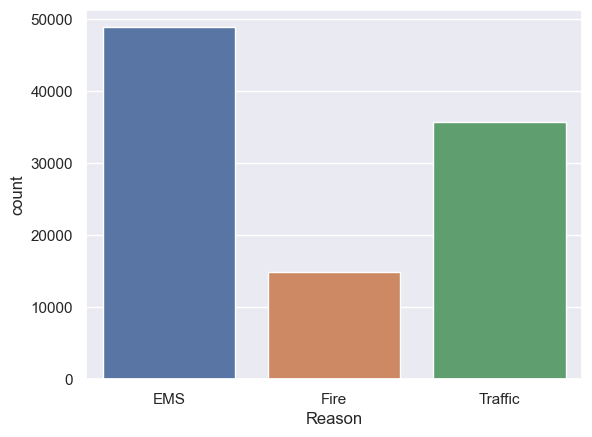

In [9]:
sns.countplot(df, x='Reason')

___
Now I'll concentrate more on the time information, by converting for first the 'timeStamp' feature from object to a DateTime object (using pd.to_datetime).

In [10]:
df['timeStamp'].dtype

dtype('O')

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].dtype

dtype('<M8[ns]')

Now It's possible to read time values from the 'timeStamp' feature. Indeed, I take advantage from this to create 3 new columns, dedicated to hour, month and day of the week of the call.

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda d: d.hour)
df['Month'] = df['timeStamp'].apply(lambda d: d.month)
df['Day of Week'] = df['timeStamp'].apply(lambda d: d.weekday())

# 'Day of Week' convertion
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].apply(
    lambda d: dmap[d] if (type(d) == int) else d)

For each weekday let's see the number of 911 calls, always divided by reason:

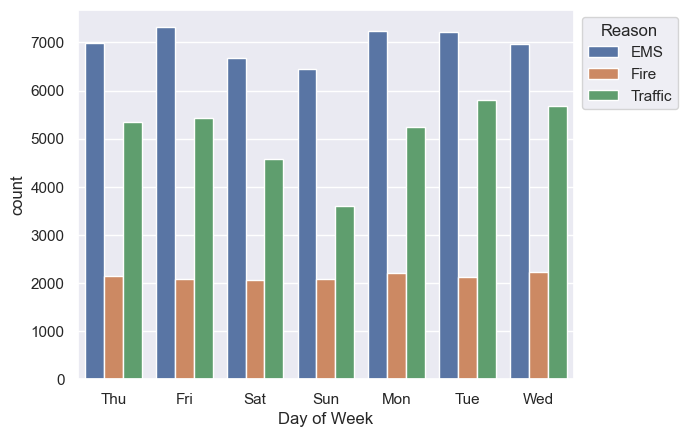

In [13]:
ax = sns.countplot(df, x='Day of Week', hue='Reason')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Same thing for the month:

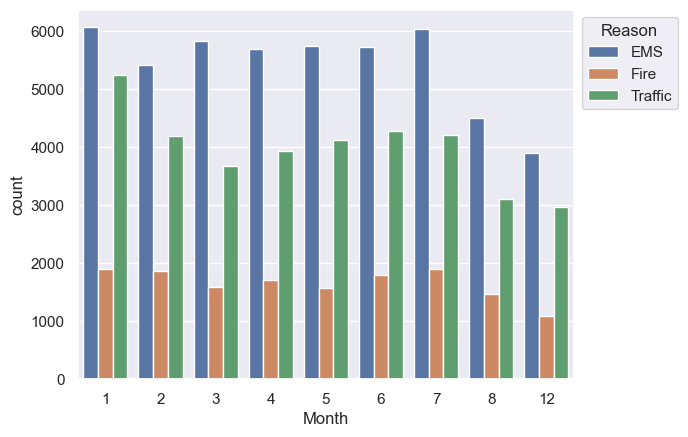

In [14]:
ax = sns.countplot(df, x='Month', hue='Reason')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

- - -
In the last plot there's a strange thing: the September, October and November months are missing!

Always using the pandas library, I'll try to reformat the data to fill the missing information somehow. This, starting from grouping the dataset by month.

In [15]:
byMonth = df.groupby('Month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Let's start with a simple lineplot to see how the 911 calls goes through the missing months:

<AxesSubplot: xlabel='Month'>

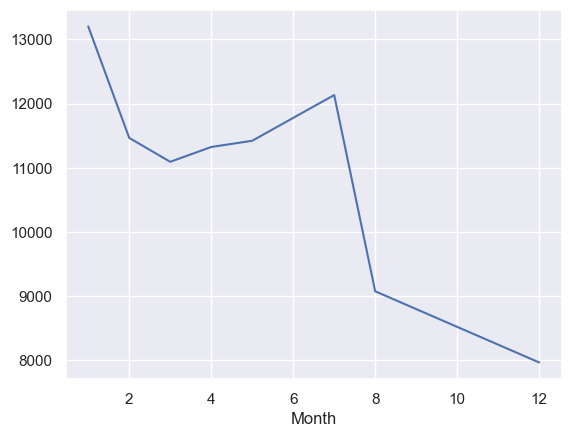

In [16]:
# the 'twp' coloumn is chosen by random, since the dataframe is grouped by month
byMonth['twp'].plot.line()

The I can pass plotting an lmplot(), to create a linear fit on the number of calls per month.

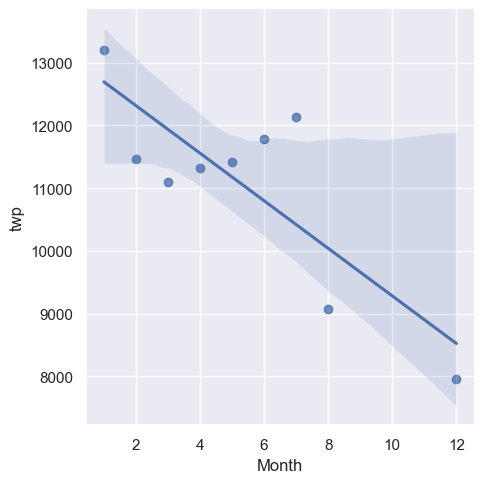

In [17]:
byMonth['Month'] = byMonth.index
sns.lmplot(byMonth, x='Month', y='twp')

- - -
Let's pass on analyzing number of 911 calls through the days instead. 

For first, I create a new feature "Date", always taking the data from the 'timeStamp' column.

In [18]:
df['Date'] = df['timeStamp'].apply(lambda d: d.date())

Now I can start plotting a linechart to see the 911 calls trend:

[Text(0.5, 1.0, 'Number of 911 calls per days')]

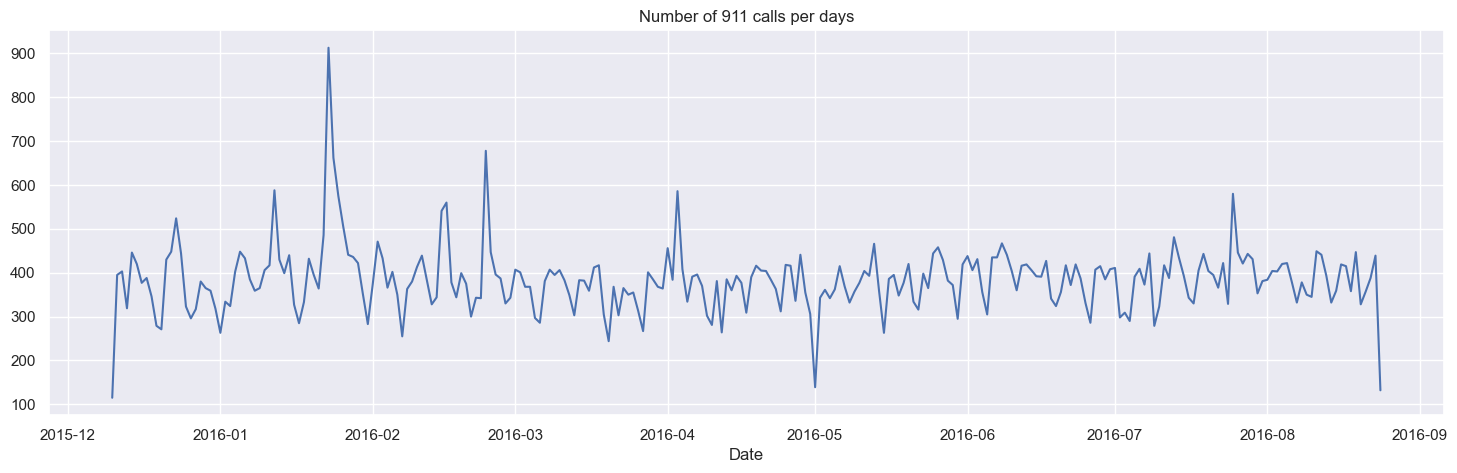

In [19]:
byDate = df.groupby('Date').count()
byDate['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days')

This, followed by a plot for each of the 3 calls reson.

[Text(0.5, 1.0, 'Number of 911 calls per days, due to EMS reasons')]

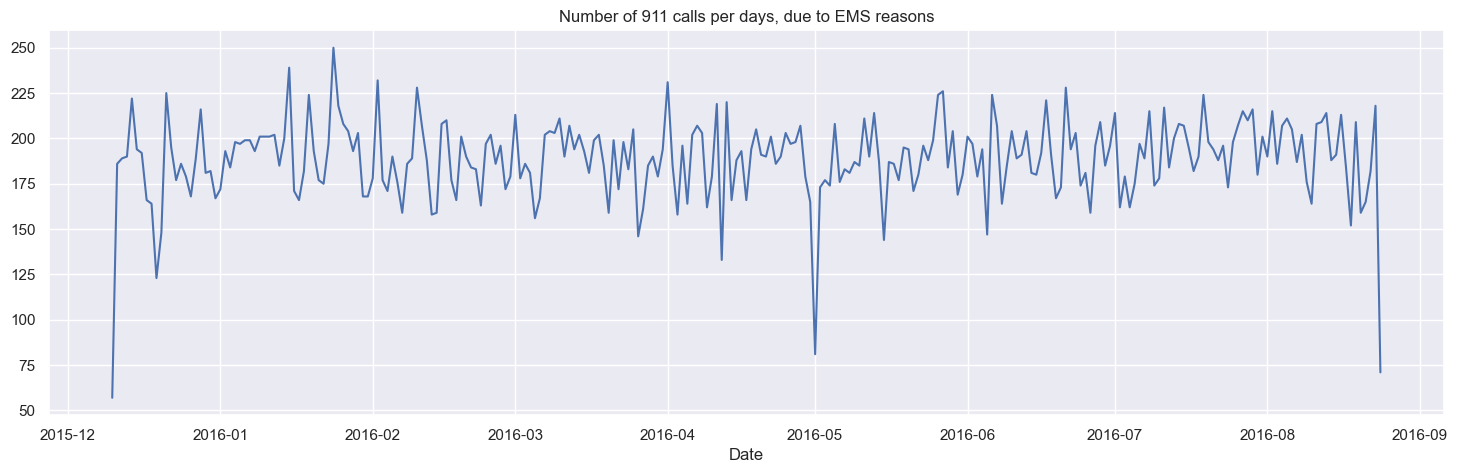

In [20]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to EMS reasons')

[Text(0.5, 1.0, 'Number of 911 calls per days, due to traffic reasons')]

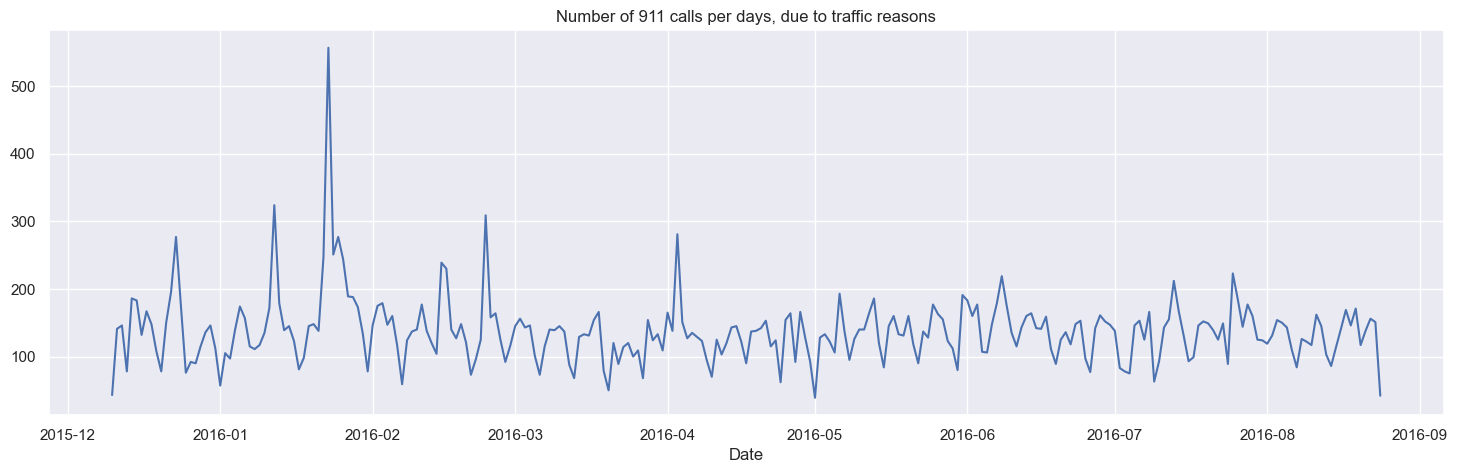

In [21]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to traffic reasons')

[Text(0.5, 1.0, 'Number of 911 calls per days, due to fire reasons')]

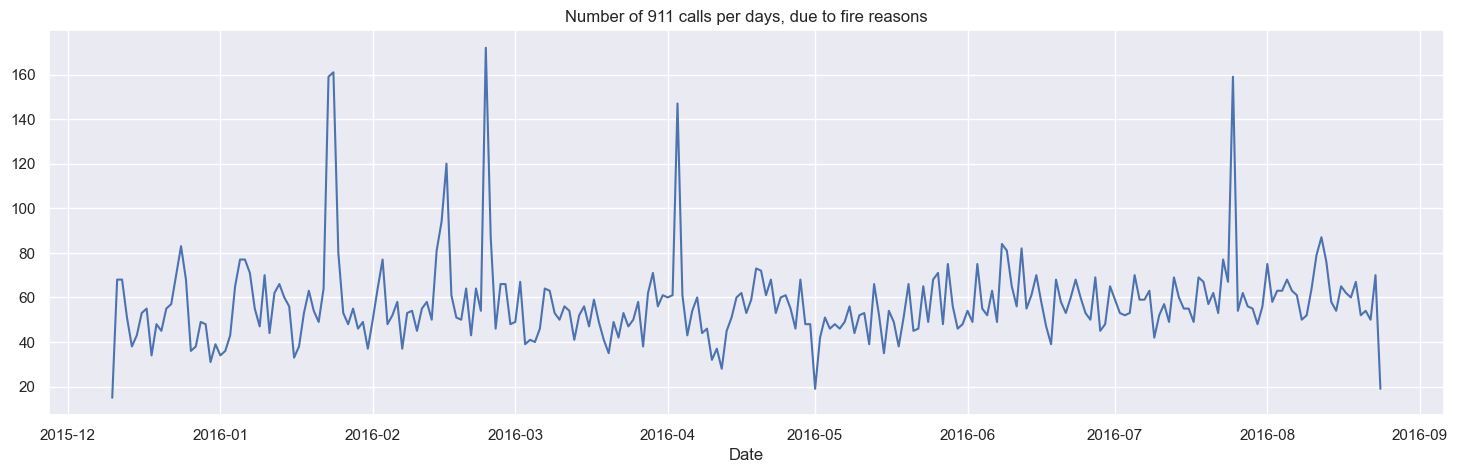

In [22]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot.line(figsize=(18,5)).set(title='Number of 911 calls per days, due to fire reasons')

____
In the last part of the EDA of this dataset, we concentrate on correlating time data using heatmap and clustermap.

I start creating a matrix to show the number of 911 calls for each hour of the day of week.

In [23]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Firstly, let's plot this matrix in a heatmap:

<AxesSubplot: xlabel='Hour', ylabel='Day of Week'>

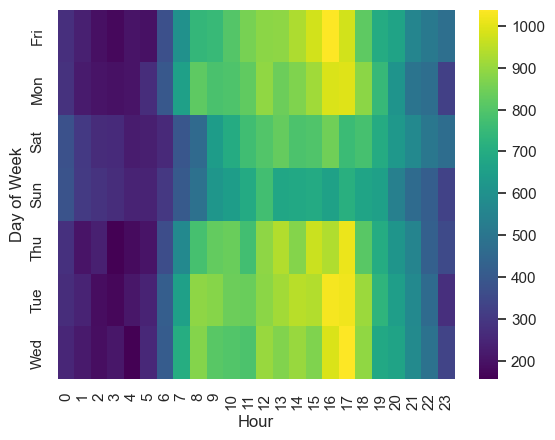

In [24]:
sns.heatmap(dayHour, cmap='viridis')

Then, to see common values grouped together, we pass to a clustermap:

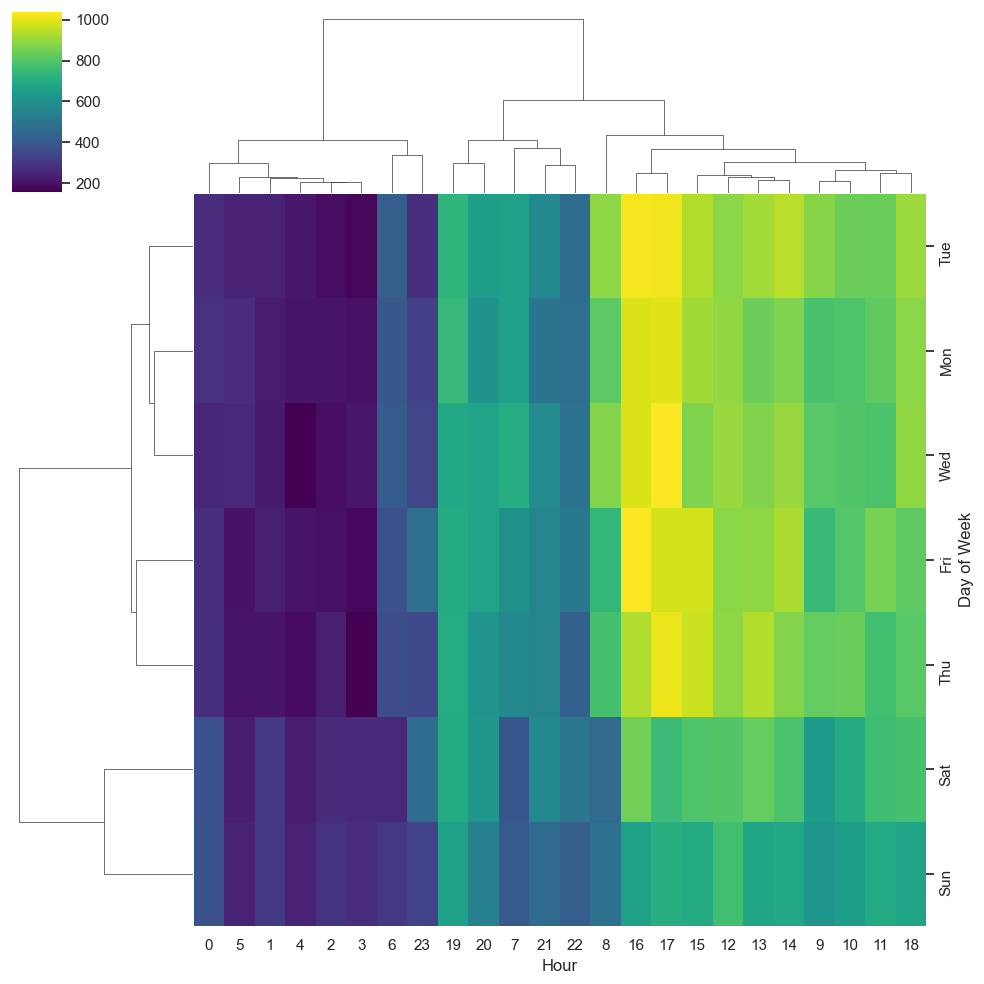

In [25]:
sns.clustermap(dayHour, cmap='viridis')

As we can expect and see from the 2 plots, most of the calls are concentrated in the most active hours of the day the afternoon 16th and 17th hours.

In this case, we a concentration especially on Tuesday.

Now I reapeat the same procedure, replacing the hours with the month.

In [26]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<AxesSubplot: xlabel='Month', ylabel='Day of Week'>

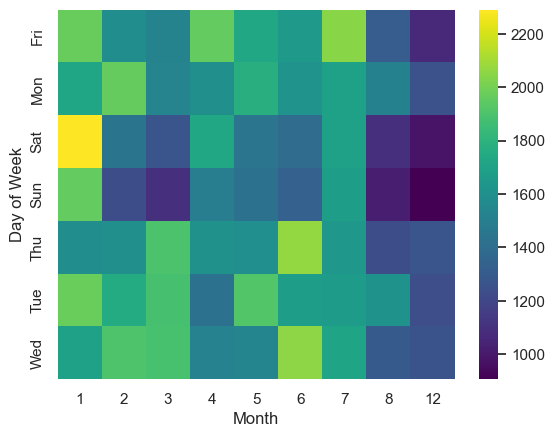

In [27]:
sns.heatmap(dayMonth, cmap='viridis')

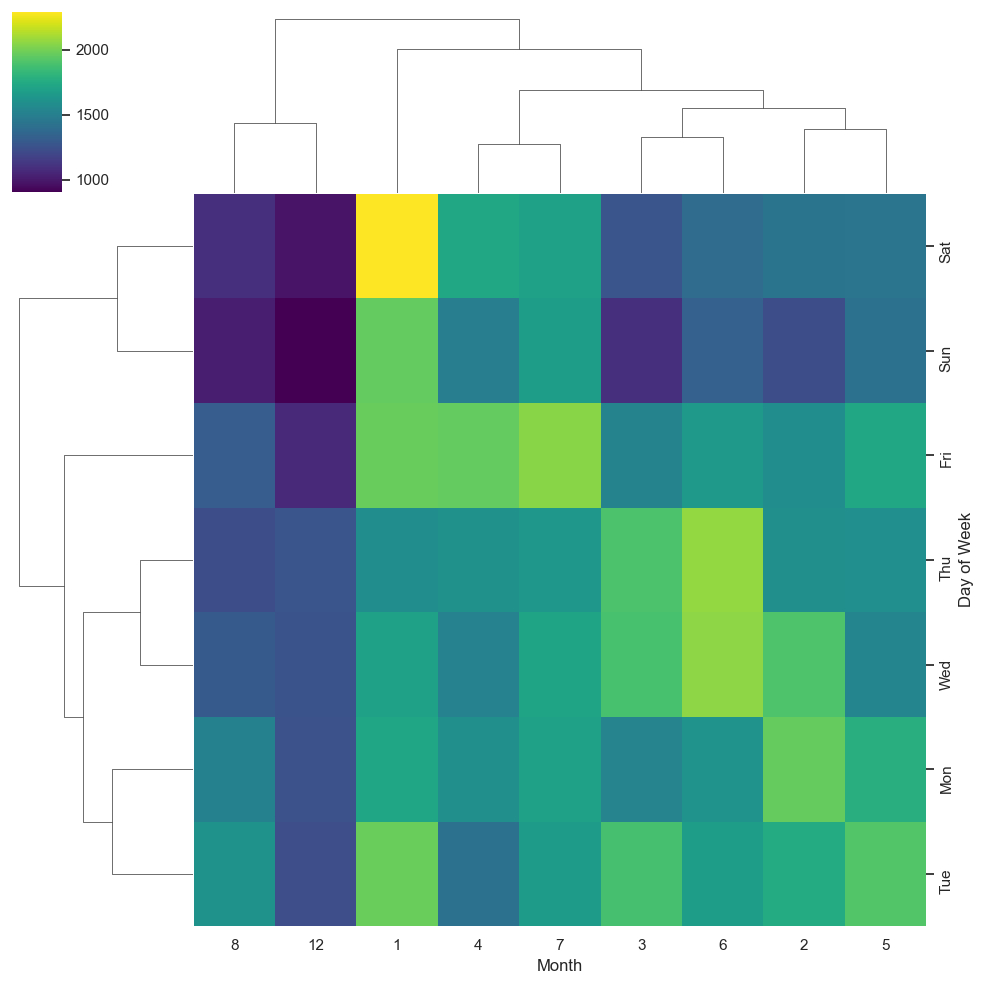

In [28]:
sns.clustermap(dayMonth, cmap='viridis')


The result seen on the heatmap and on the clustermap is the concentration of the 911 calls in the Saturdays of January. 